<a href="https://colab.research.google.com/github/yunjungjoe/Clustering/blob/main/Mall_Customers_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mall Customers Clustering Analysis

1) Data Visualization  
2) Clustering Analysis  
3) K-means Algorithm  
4) Hierachial Clustering  

In [3]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [7]:
# importing the dataset
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
data.shape

(200, 5)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
# checking for the null value
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [29]:
# label classes
le.classes_

array(['Female', 'Male'], dtype=object)

In [31]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
! pip install shap
import shap

     |████████████████████████████████| 564 kB 8.2 MB/s 


# Data Visualization

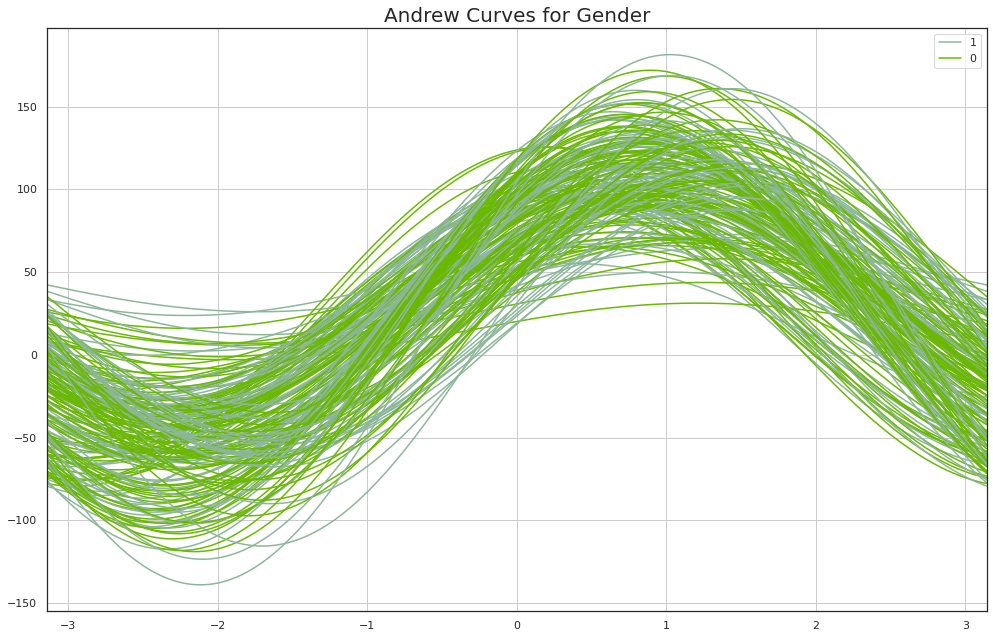

In [33]:
plt.rcParams['figure.figsize'] = (15, 10)

plotting.andrews_curves(data.drop("CustomerID", axis=1), "Gender")
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

In [21]:
sns.set(style="white", palette="cubehelix", color_codes=True)

**Gender Distribution**

Female : 56.00000000000001
Male : 44.0


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0.5, 1.0, 'Gender distirbution')

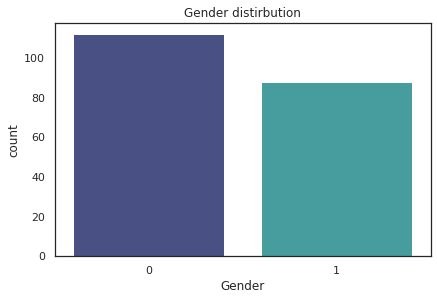

In [32]:
sns.countplot('Gender',data=data,palette='mako')
size=data['Gender'].value_counts()
print('Female :',size[0]/(size[0]+size[1])*100)
print('Male :',size[1]/(size[0]+size[1])*100)
plt.title("Gender distirbution")

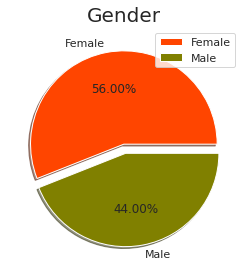

In [37]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['orangered', 'olive']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (4, 4)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Female contributes more to the shopping. The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.   
  
  
**Distribution of Age**

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


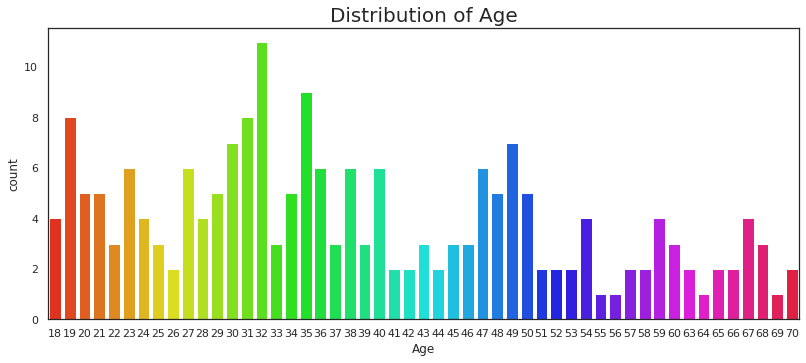

In [40]:
plt.rcParams['figure.figsize'] = (12, 5)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

This Graph shows the Visitor's Age Group in the Mall. By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern. People at Age 32 are the Most Frequent Visitors in the Mall.  People of Age 55, 56, 64, 69 are very less frequent in the Malls. 

**Distribution of Annual Income**

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


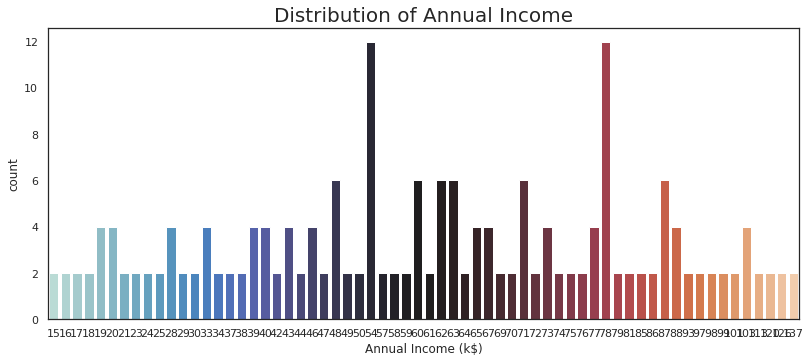

In [44]:
plt.rcParams['figure.figsize'] = (12, 5)
sns.countplot(data['Annual Income (k$)'], palette = 'icefire')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()